<a href="https://colab.research.google.com/github/PeterYves/DIC-ML-Assignmnent/blob/main/analysis_of_credit_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [Problem 1] Understanding the content of the competition

---



1.   **What kind of company is Home Credit?**

>> **Home credit** is a company that strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience.

2.   **What is expected in this competition?**

>> Making use of a variety of alternative data--including telco and transactional information--to predict the clients' repayment abilities.

3.   **What are the benefits companies can gain by predicting this?**

>> Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful. 


### [Problem 2] Understanding the overview of data

---





*   `Use .head() , .info() , describe() , etc.​ ​`



In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

application_df = pd.read_csv("application_train.csv")
application_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11631 entries, 0 to 11630
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(103), int64(3), object(16)
memory usage: 10.8+ MB


In [ ]:
application_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,11631.000000,11631.000000,11631.000000,1.163100e+04,1.163100e+04,11631.000000,1.162200e+04,11630.000000,11630.000000,11630.000000,...,11630.000000,11630.000000,11630.000000,11630.000000,10047.000000,10047.000000,10047.000000,10047.000000,10047.000000,10047.000000
mean,106779.581635,0.077207,0.419310,1.678720e+05,6.000947e+05,27103.465179,5.398775e+05,0.020873,-16006.466552,62413.721496,...,0.007481,0.000430,0.000602,0.000344,0.007465,0.008062,0.032248,0.273017,0.267343,1.880362
std,3906.503090,0.266932,0.724348,9.649099e+04,4.026802e+05,14388.019640,3.704646e+05,0.013925,4345.476926,140107.177180,...,0.086170,0.020731,0.024527,0.018543,0.089483,0.115642,0.190233,0.940290,0.613725,1.850854
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,2596.500000,4.500000e+04,0.000938,-25160.000000,-15632.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,103389.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,-19589.250000,-2809.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,106799.000000,0.000000,0.000000,1.440000e+05,5.124465e+05,24997.500000,4.500000e+05,0.018850,-15760.500000,-1222.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,110151.500000,0.000000,1.000000,2.025000e+05,8.100000e+05,34744.500000,6.795000e+05,0.028663,-12349.500000,-290.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,113548.000000,1.000000,7.000000,2.250000e+06,2.961000e+06,135936.000000,2.961000e+06,0.072508,-7705.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,16.000000,8.000000,13.000000


In [ ]:
application_df.count()

SK_ID_CURR                    11631
TARGET                        11631
NAME_CONTRACT_TYPE            11631
CODE_GENDER                   11631
FLAG_OWN_CAR                  11631
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     10047
AMT_REQ_CREDIT_BUREAU_WEEK    10047
AMT_REQ_CREDIT_BUREAU_MON     10047
AMT_REQ_CREDIT_BUREAU_QRT     10047
AMT_REQ_CREDIT_BUREAU_YEAR    10047
Length: 122, dtype: int64

In [ ]:
application_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [ ]:
application_df.shape

(11631, 122)

* `Check for missing values`

In [ ]:
missing_values = application_df[application_df.columns[application_df.isnull().sum() > 0]].isnull().sum()
missing_values 

AMT_GOODS_PRICE                  9
NAME_TYPE_SUITE                 46
NAME_FAMILY_STATUS               1
NAME_HOUSING_TYPE                1
REGION_POPULATION_RELATIVE       1
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     1584
AMT_REQ_CREDIT_BUREAU_WEEK    1584
AMT_REQ_CREDIT_BUREAU_MON     1584
AMT_REQ_CREDIT_BUREAU_QRT     1584
AMT_REQ_CREDIT_BUREAU_YEAR    1584
Length: 110, dtype: int64

* `Draw a graph showing the percentage of classes:`

>> From the HomeCredit_columns_description.csv file, we can know that TARGET is the target variable. Hence, we will plot the classes percentage of this value.

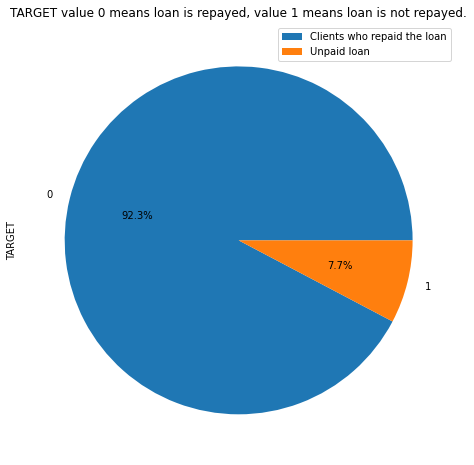

In [56]:
tg = application_df["TARGET"].value_counts()
plt.subplots(figsize=(12,8))
pie_target = tg.plot.pie(autopct="%.1f%%")
pie_target.legend(loc=1, labels={'Clients who repaid the loan': 0, 'Unpaid loan': 1})
plt.title("TARGET value 0 means loan is repayed, value 1 means loan is not repayed.")
plt.show()

### [Problem 3] Defining issues

---





1. By ploting graphs please show:
   - What are the types of loans clients has taken?
   - What is the percent of the loans (by type of the loan) with TARGET value 1 (not returned loan).

2. What is the gender of the clients? And also on a separate plot, show the percent of the loans (by client gender) with TARGET value 1(unpaid loans).

3. What is the family status of clients?

4. What is the number of children the client has?

5. What is the number of family members of the client?

6. What is the income type of the client?

7. What is the ocupation of client?




### [Problem 4] Data exploration

---



**1. By ploting graphs please show:**
   - **What are the types of loans clients has taken?**
   - **What is the percent of the loans (by type of the loan) with TARGET value 1 (not returned loan).**

In [58]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [59]:
def plot_distribution(var):
    
    i = 0
    t1 = application_df.loc[application_df['TARGET'] != 0]
    t0 = application_df.loc[application_df['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

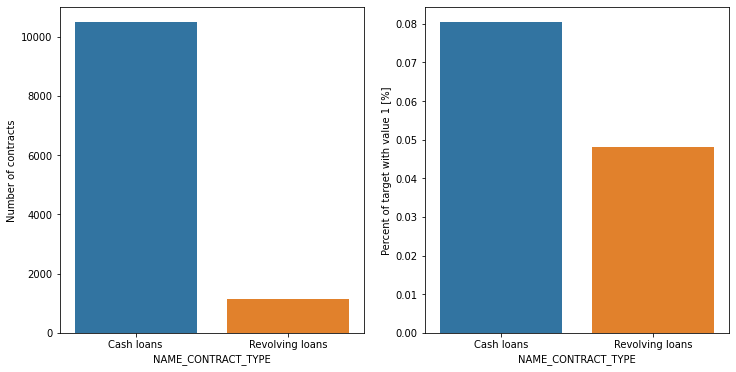

In [60]:
plot_stats('NAME_CONTRACT_TYPE')

**2. What is the gender of the clients? And also on a separate plot, show the percent of the loans (by client gender) with TARGET value 1(unpaid loans).**

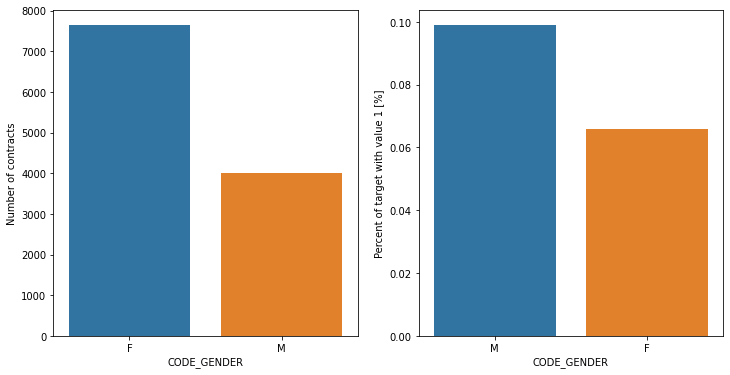

In [61]:
plot_stats('CODE_GENDER')

**3. What is the family status of clients?**

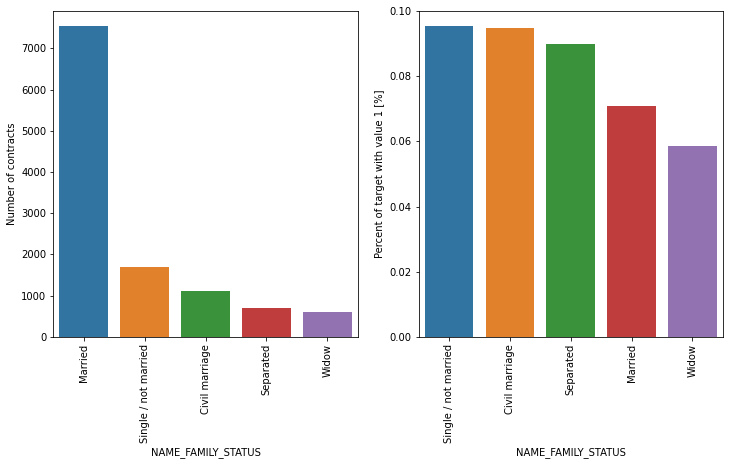

In [62]:
plot_stats('NAME_FAMILY_STATUS',True, True)

**4. What is the number of children the client has?**

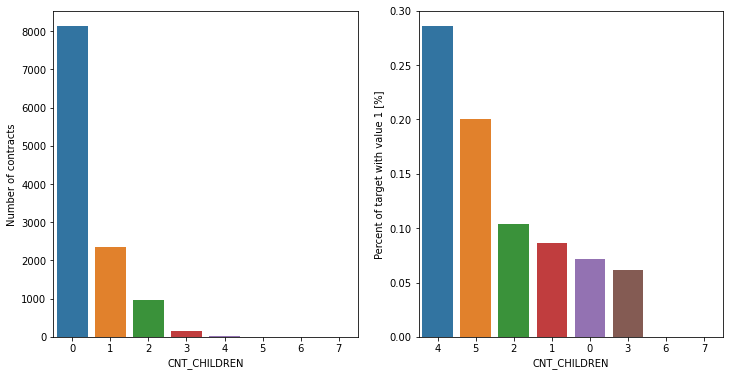

In [63]:
plot_stats('CNT_CHILDREN')

**5. What is the number of family members of the client?**

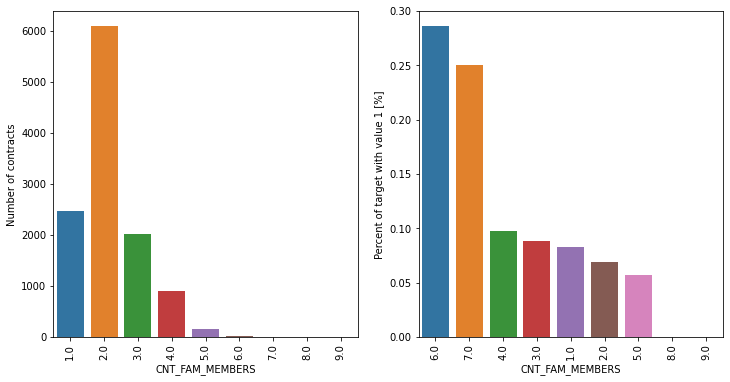

In [64]:
plot_stats('CNT_FAM_MEMBERS',True)

**6. What is the income type of the client?**

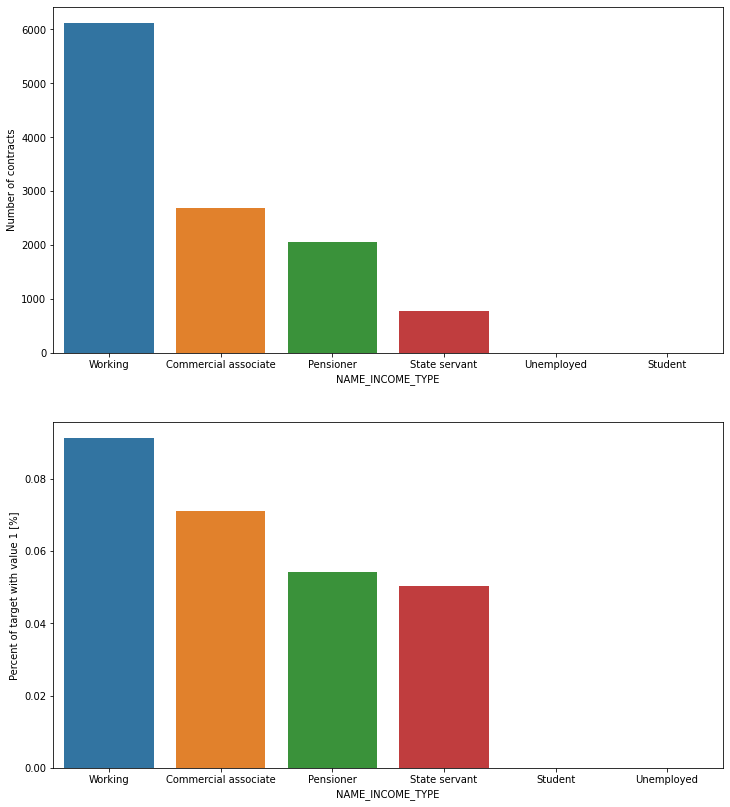

In [65]:
plot_stats('NAME_INCOME_TYPE',False,False)

**7. What is the ocupation of client?**

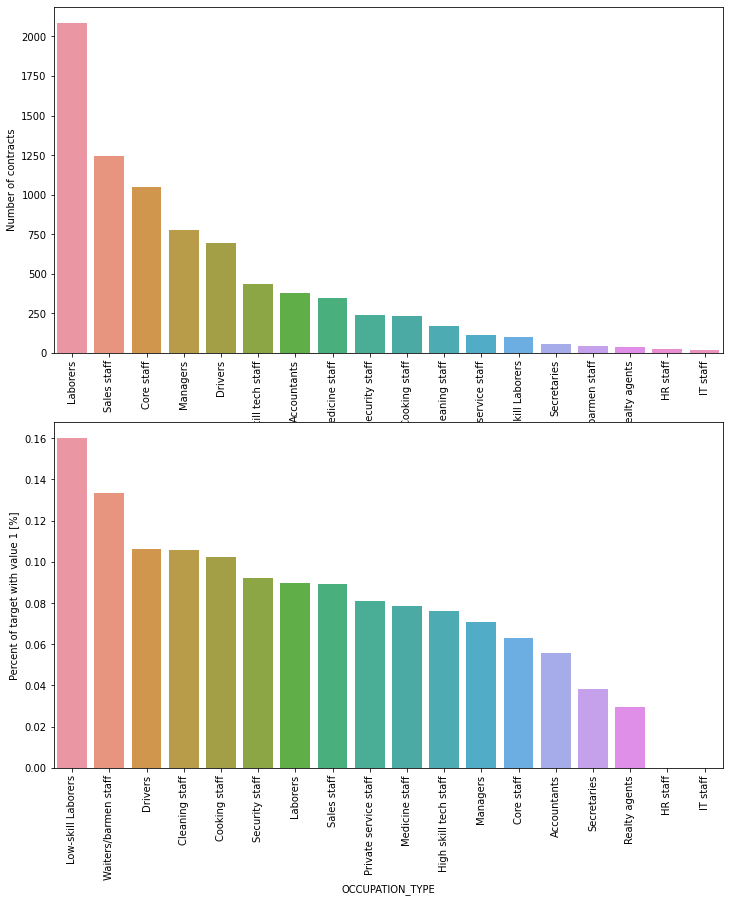

In [66]:
plot_stats('OCCUPATION_TYPE',True, False)